# Classifying personal income

## Required packages

In [175]:
 #  To work with dataframe
import pandas as pd 

#  To work with numerical operations
import numpy as np

#  To visuallizw data
import seaborn as sns

 #  To partition the data
from sklearn.model_selection import train_test_split 

 #  Importing performance metrics - accuracy score & confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix

 #  Importing library for Logistic Regression
from sklearn.linear_model import LogisticRegression         

In [132]:
# Importing the data
data_income = pd.read_csv("E://Data Set//income(1).csv")
data_income.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [133]:
# Creating the copy of original data
data = data_income.copy()

### Exploratory data analytics:

1) Getting to know the data
2) Data preprocessing (Missing values)
3) Cross tables and data visualization

## 1) Getting to know the data

In [134]:
#  To check the variables data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [135]:
#  Check for misiing values
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [136]:
#  No missing values
print('Data columns with null values:\n', data.isnull().sum())

Data columns with null values:
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


In [137]:
summary_num = data.describe()   # summary of numeric variables
summary_num

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [138]:
summary_cate = data.describe(include = 'O')  # summary of categorical variables // O means object
summary_cate

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [139]:
data['JobType'].value_counts()  # Frequency of each categories

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [140]:
data['occupation'].value_counts()   # Frequency of each categories

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [141]:
np.unique(data['JobType'])   # checking for unique classes

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [142]:
np.unique(data['occupation'])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

There is exists ' ?' instead of nan

In [143]:
#  Read data by including "na_values[' ?']" to consider ' ?' as nan
data = pd.read_csv("E://Data Set//income(1).csv", na_values = [' ?'])
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

## 2)Data Preprocessing

In [144]:
missing = data[data.isnull().any(axis=1)]
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


axis=1 => to consider at least one column value is missing

Point to note:

1) Missing values in jobtype    = 1809
2) Missing values in Occupation   = 1816
3) There are 1809 row where two specific columns i.e. occupation & jobtype have misiing values
4) (1816-1809) = 7 => You still have occupation unfilled for these 7 rows. Because, job type is never worked

In [145]:
data2 = data.dropna(axis=0)    #  Removing rows that contain a Nan values
data2.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [146]:
correlation = data2.corr()  # get pair wise correlation //   relationship between independent variables
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


## 3) Cross tables & Data visualization

Gender proportion table:

In [147]:
gender = pd.crosstab(index = data2['gender'],
                     columns = 'count',
                     normalize = True)
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


Gender vs Salary Status:

In [148]:
gender_salstat = pd.crosstab(index = data2['gender'],
                             columns = data2['SalStat'],
                             margins = True,
                             normalize = 'index')
gender_salstat

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


C:\Users\LEGION\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


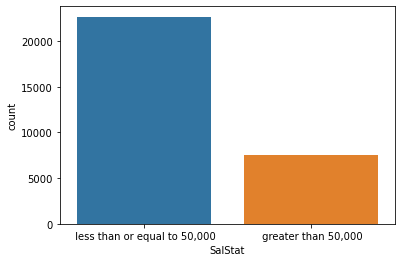

In [149]:
salstat = sns.countplot(data2['SalStat'])  # frequency distribution of salary status

75% of pepole's salary status is <= 50000
& 25% of pepole's salary status is >50000

Histogram of Age

C:\Users\LEGION\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

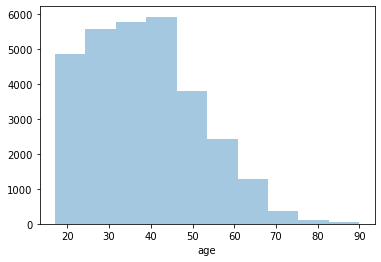

In [150]:
sns.distplot(data2['age'], bins=10, kde=False)

Pepole with age 20-45 age are high in frequency

Box plot - Age vs Salary Status

C:\Users\LEGION\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

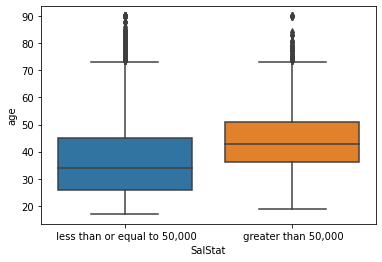

In [151]:
sns.boxplot('SalStat', 'age', data=data2)
data2.groupby('SalStat')['age'].median()

People with 35-50 age are more likely to learn > 50000
People with 25-35 age are more likely to earn <= 50000

## Logistic Regression

In [152]:
# Reindexing the salary status names 0 to 1
data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
data2['SalStat']


C:\Users\LEGION\AppData\Local\Temp\ipykernel_25644\3956268465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

In [153]:
new_data = pd.get_dummies(data2, drop_first=True)

In [154]:
# storing column names
column_list = list(new_data)
column_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Pr

In [155]:
# separating the input names from data
features = list(set(column_list) - set(['SalStat']))
features

['race_ Black',
 'nativecountry_ Outlying-US(Guam-USVI-etc)',
 'nativecountry_ Scotland',
 'EdType_ Doctorate',
 'relationship_ Unmarried',
 'occupation_ Craft-repair',
 'nativecountry_ Hong',
 'nativecountry_ Haiti',
 'nativecountry_ Cuba',
 'nativecountry_ Canada',
 'EdType_ Assoc-acdm',
 'nativecountry_ Poland',
 'occupation_ Handlers-cleaners',
 'maritalstatus_ Married-civ-spouse',
 'EdType_ 7th-8th',
 'gender_ Male',
 'EdType_ Assoc-voc',
 'occupation_ Farming-fishing',
 'relationship_ Not-in-family',
 'nativecountry_ Columbia',
 'nativecountry_ England',
 'nativecountry_ Italy',
 'age',
 'nativecountry_ Nicaragua',
 'occupation_ Sales',
 'nativecountry_ United-States',
 'EdType_ 1st-4th',
 'nativecountry_ Portugal',
 'maritalstatus_ Widowed',
 'occupation_ Protective-serv',
 'occupation_ Prof-specialty',
 'occupation_ Armed-Forces',
 'nativecountry_ Germany',
 'occupation_ Exec-managerial',
 'relationship_ Own-child',
 'nativecountry_ Vietnam',
 'nativecountry_ Philippines',
 'na

In [156]:
#  Storing output values in y
y = new_data['SalStat'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [157]:
#  Storing the values from input features
x = new_data[features].values
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [158]:
logistic = LogisticRegression()  # make an instance of model

In [159]:
logistic.fit(train_x, train_y)  # fitting value for x and y
logistic.coef_                  # coefficient value of each variable

C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 6.42971491e-01,  2.78839804e-01, -6.44639559e-01,
        -5.33368386e-02, -3.72399159e-01, -5.07000444e-01,
        -1.04083612e-01, -8.52037396e-02, -3.99111173e-01,
         2.69889947e-01,  1.06962768e+00, -2.48183464e-01,
        -4.76377813e-02, -8.30646463e-02, -3.05720628e-01,
         3.94050184e-02, -5.64596960e-01, -1.72554462e-03,
         3.11753492e-03,  6.52254860e-04, -8.24031977e-01,
         4.14042448e-02, -6.81625224e-02, -1.01489275e-01,
        -1.48545426e-03,  7.10156875e-01,  4.00303924e-02,
        -2.63632155e-01, -2.08894928e-01,  9.00291425e-01,
        -1.09519576e+00, -1.84755485e-01,  5.74152456e-01,
        -1.95678016e-01, -1.58867543e+00, -1.06026808e+00,
         3.18952841e-04, -1.34615197e-01, -4.46070758e-01,
        -3.51970414e-01, -2.56938117e-02,  1.64902702e-02,
         8.23441508e-02]])

In [160]:
logistic.intercept_   # intercept value of B0 variable 

array([-1.40310036])

In [161]:
prediction = logistic.predict(test_x)   # prediction from test data
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [162]:
confusion_matrix = confusion_matrix(test_y, prediction)  # confusion matrix
confusion_matrix

array([[6296,  527],
       [ 979, 1247]], dtype=int64)

In [163]:
accuracy_score = accuracy_score(test_y, prediction)    # calculating accuracy
accuracy_score

0.8335727704718754

In [164]:
print('Misclassified samples: %d' % (test_y != prediction).sum())   # Printing Misclassified values from prediction

Misclassified samples: 1506


## Logistic Regression - Removing Insignificant variables

In [165]:
# Reindexing the salary status names 0 to 1
data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
data2['SalStat']

C:\Users\LEGION\AppData\Local\Temp\ipykernel_25644\1005080708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
31973   NaN
31974   NaN
31975   NaN
31976   NaN
31977   NaN
Name: SalStat, Length: 30162, dtype: float64

In [166]:
col = ['gender', 'nativecountry', 'race', 'JobType']
new_data = data2.drop(col, axis=1)
new_data = pd.get_dummies(new_data, drop_first=True)

In [167]:
#  Storing the column names
column_list = list(new_data.columns)
column_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty',
 'occupation_ Protective-serv',
 'occupation_ Sales',
 'occupation_ Tech-support',
 'occupation_ Transport-moving',
 'relationship_ N

In [168]:
# separating the input names from data
features = list(set(column_list) - set(['SalStat']))
features

['EdType_ Bachelors',
 'EdType_ Doctorate',
 'relationship_ Unmarried',
 'maritalstatus_ Married-spouse-absent',
 'occupation_ Craft-repair',
 'EdType_ Some-college',
 'EdType_ 12th',
 'EdType_ Assoc-acdm',
 'occupation_ Handlers-cleaners',
 'EdType_ Prof-school',
 'maritalstatus_ Married-civ-spouse',
 'EdType_ 7th-8th',
 'occupation_ Priv-house-serv',
 'EdType_ Assoc-voc',
 'occupation_ Farming-fishing',
 'relationship_ Wife',
 'relationship_ Not-in-family',
 'age',
 'hoursperweek',
 'capitalloss',
 'occupation_ Other-service',
 'occupation_ Sales',
 'EdType_ 1st-4th',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Prof-specialty',
 'occupation_ Protective-serv',
 'relationship_ Other-relative',
 'occupation_ Transport-moving',
 'occupation_ Exec-managerial',
 'relationship_ Own-child',
 'EdType_ 9th',
 'EdType_ Masters',
 'maritalstatus_ Separated',
 'maritalstatus_ Never-married',
 'EdType_ HS-grad',
 'capitalgain',
 'EdType_ 5th-6th',
 'occupation_ Machine-op

In [169]:
#  Storing output values in y
y = new_data['SalStat'].values
y

array([nan, nan, nan, ..., nan, nan, nan])

In [170]:
#  Storing the values from input features
x = new_data[features].values
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [180]:
#  Spiltting the data into train and test
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3, random_state=0)

In [181]:
logistic = LogisticRegression()  # make an instance of model

In [183]:
logistic.fit(train_x, train_y)  # fitting value for x and y                  

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [179]:
prediction = logistic.predict(test_x)   # prediction from test data
prediction

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
confusion_matrix = confusion_matrix(test_y, prediction)  # confusion matrix
confusion_matrix

In [ ]:
accuracy_score = accuracy_score(test_y, prediction)    # calculating accuracy
accuracy_score

In [ ]:
print('Misclassified samples: %d' % (test_y != prediction).sum())   # Printing Misclassified values from prediction

## KNN

In [ ]:
#  importing the library of KNN
from sklearn.neighbors import KNeighborsClassifier

#  importing library for plotting
import matplotlib.pyplot as plt

In [ ]:
#  storing the K nearest neighbors classifiers
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)

#  Fitting the values for X and Y
KNN_classifier.fit(train_x, train_y)

#  predicting the test value with model
prediction = KNN_classifier.predict(test_x)

In [ ]:
#  performance metric check
confusion_matrix = confusion_matrix(test_y, prediction)
print('\t', 'Predicted values')
print('Original values', '\n', confusion_matrix)

In [174]:
accuracy_score = accuracy_score(test_y, prediction)    # calculating accuracy
accuracy_score

TypeError: 'numpy.float64' object is not callable